In [1]:

from google.colab import drive
import pandas as pd
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 데이터 로드

path = '/content/drive/MyDrive/Colab Notebooks/dataset'
fn = 'summer-products-with-rating-and-performance_2020-08.csv'
df = pd.read_csv(os.path.join(path, fn))
print(df.isna().sum())
df.head(3)

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.0,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [4]:
df.columns # units_sold -> target

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

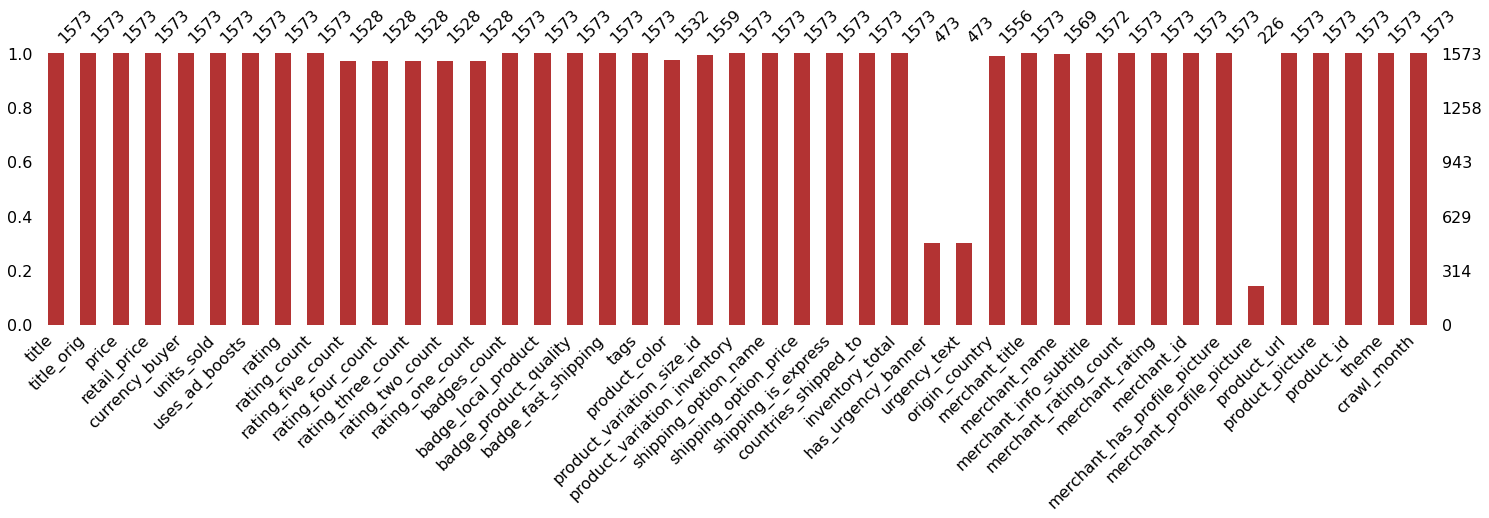

In [5]:
# 결측값 확인

import missingno as msno
import matplotlib.pyplot as plt

msno.bar(df, figsize=(25,5), color=(0.7,0.2,0.2))
plt.show()

In [6]:
df['has_urgency_banner'].value_counts(dropna=False)

NaN    1100
1.0     473
Name: has_urgency_banner, dtype: int64

In [7]:
df['has_urgency_banner'] = df['has_urgency_banner'].fillna(0)
df['has_urgency_banner'].value_counts(dropna=False)

0.0    1100
1.0     473
Name: has_urgency_banner, dtype: int64

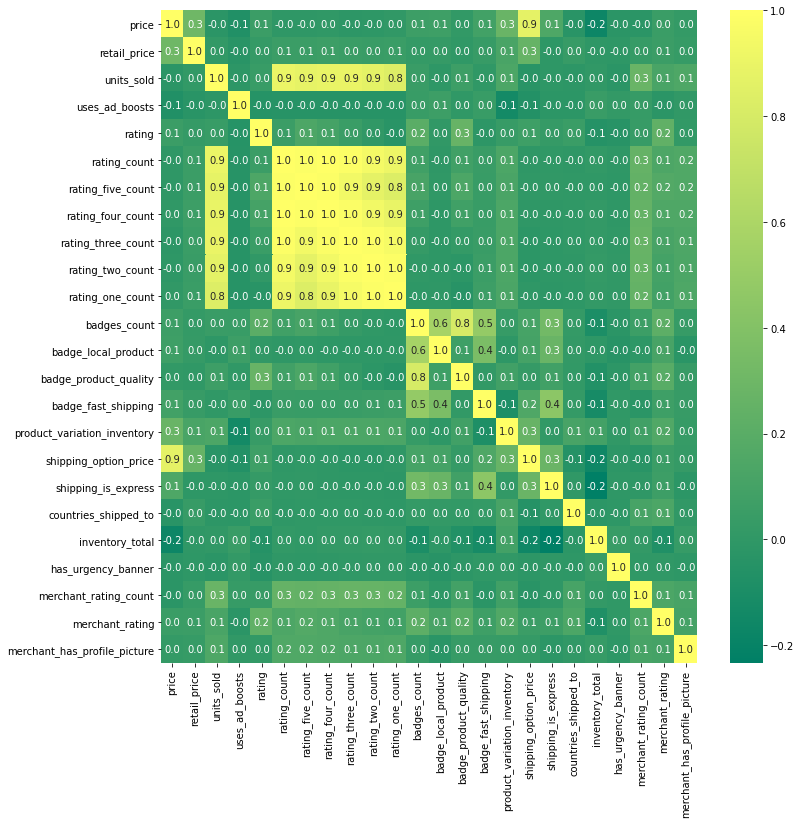

In [8]:
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='summer', annot=True, fmt="0.1f")

In [9]:
# 수치형 컬럼만 출력
num_col = df.describe().columns
print(num_col)

psf = df.loc[:,num_col]

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'merchant_rating_count',
       'merchant_rating', 'merchant_has_profile_picture'],
      dtype='object')


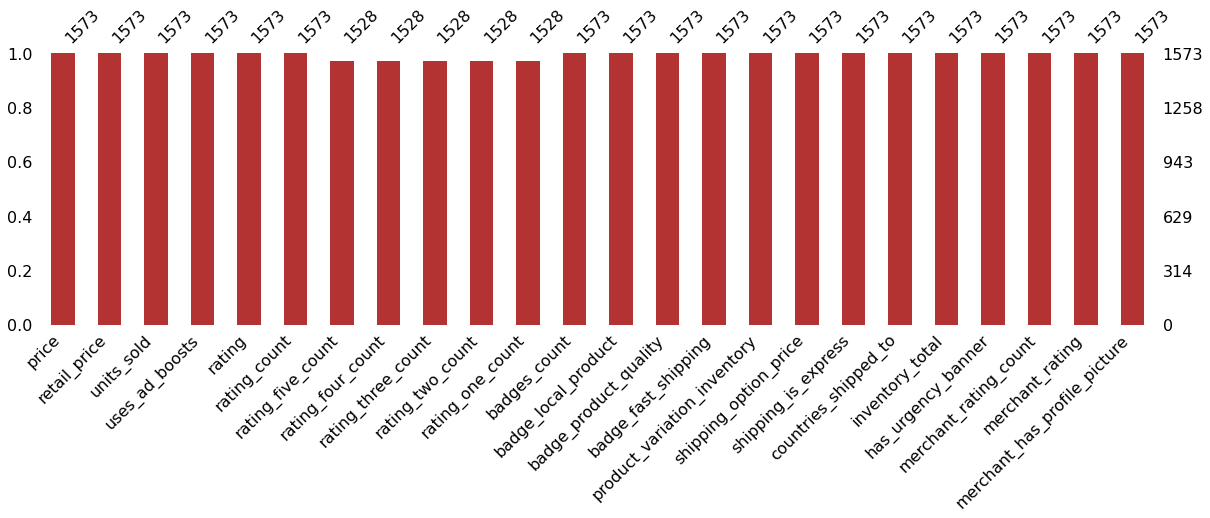

In [10]:
msno.bar(psf, figsize=(20,5), color=(0.7,0.2,0.2))
plt.show()

Text(0.5, 1.0, 'Features Correlating with units_sold')

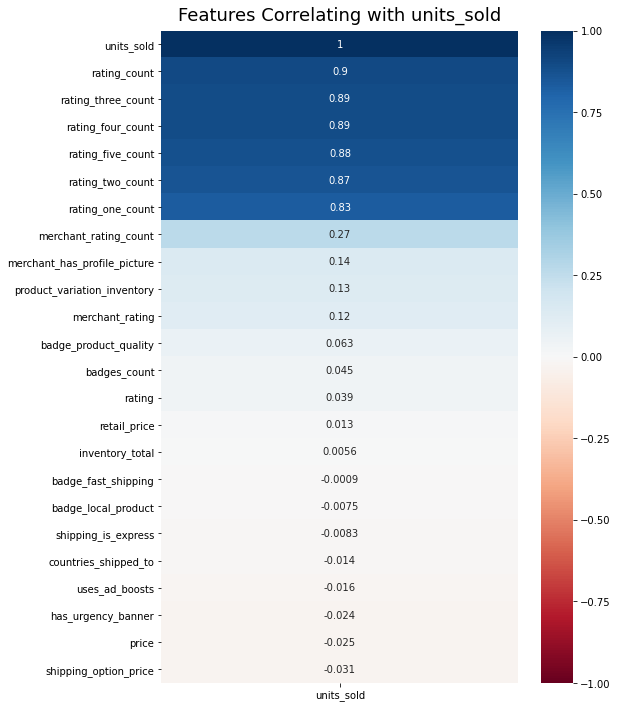

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

target_col = 'units_sold'

plt.figure(figsize=(8, 12))
hm = sns.heatmap(df.corr()[[target_col]].sort_values(by=target_col, ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdBu')
hm.set_title(f'Features Correlating with {target_col}', fontdict={'fontsize':18}, pad=10)

# inventory_total, badge_fast_shipping, badge_local_product, shipping_is_express -> 거의 상관없는거 제외

In [14]:
# 명목형 컬럼들 선택 
a = df.dtypes == 'object'

obj_col = [i for i,v in zip(a.index,a) if v]
for i,v in enumerate(obj_col):
  print(i+1,v)

<class 'pandas.core.series.Series'>
1 title
2 title_orig
3 currency_buyer
4 tags
5 product_color
6 product_variation_size_id
7 shipping_option_name
8 urgency_text
9 origin_country
10 merchant_title
11 merchant_name
12 merchant_info_subtitle
13 merchant_id
14 merchant_profile_picture
15 product_url
16 product_picture
17 product_id
18 theme
19 crawl_month


In [15]:
# 명목변수1 currency_buyer -> 고유값이 EUR 하나 이므로 지운다
df['currency_buyer'].value_counts(dropna=False)

EUR    1573
Name: currency_buyer, dtype: int64

In [16]:
# 명목변수2 product_color 고유값 102개로 너무 많아서 유사한 색깔로 묶어줄 필요가 있다 (결측값도 41개 포함)
df['product_color'].unique()

array(['white', 'green', 'leopardprint', 'black', 'yellow', 'navyblue',
       'blue', 'beige', 'grey', 'lightblue', 'orange', 'red', 'Black',
       'armygreen', nan, 'pink', 'khaki', 'red & blue', 'blue & pink',
       'RED', 'white & green', 'winered', 'black & green', 'purple',
       'whitefloral', 'floral', 'fluorescentgreen', 'orange & camouflage',
       'lightyellow', 'coolblack', 'multicolor', 'camouflage',
       'lightpink', 'pink & black', 'silver', 'Army green', 'lightgreen',
       'mintgreen', 'pink & grey', 'gray', 'coffee', 'rose',
       'light green', 'leopard', 'black & white', 'orange-red',
       'dustypink', 'White', 'star', 'white & black', 'apricot',
       'skyblue', 'burgundy', 'claret', 'pink & white', 'rosered', 'tan',
       'navy blue', 'wine red', 'lightred', 'Pink', 'coralred', 'brown',
       'lakeblue', 'darkblue', 'camel', 'pink & blue', 'nude', 'Blue',
       'lightpurple', 'army', 'black & stripe', 'Rose red',
       'greysnakeskinprint', 'denimbl

In [17]:
df['product_color'].isna().sum() # 결측값을 제거하거나 치환

41

In [20]:
import numpy as np
np.sort(df['product_color'].dropna().str.lower().unique())

array(['applegreen', 'apricot', 'army', 'army green', 'armygreen',
       'beige', 'black', 'black & blue', 'black & green',
       'black & stripe', 'black & white', 'black & yellow', 'blackwhite',
       'blue', 'blue & pink', 'brown', 'brown & yellow', 'burgundy',
       'camel', 'camouflage', 'claret', 'coffee', 'coolblack', 'coralred',
       'darkblue', 'darkgreen', 'denimblue', 'dustypink', 'floral',
       'fluorescentgreen', 'gold', 'gray', 'gray & white', 'green',
       'grey', 'greysnakeskinprint', 'ivory', 'jasper', 'khaki',
       'lakeblue', 'leopard', 'leopardprint', 'light green', 'lightblue',
       'lightgray', 'lightgreen', 'lightgrey', 'lightkhaki', 'lightpink',
       'lightpurple', 'lightred', 'lightyellow', 'mintgreen',
       'multicolor', 'navy', 'navy blue', 'navyblue', 'navyblue & white',
       'nude', 'offblack', 'offwhite', 'orange', 'orange & camouflage',
       'orange-red', 'pink', 'pink & black', 'pink & blue', 'pink & grey',
       'pink & white', 'p

In [21]:
df['product_color'] = df['product_color'].str.lower()
df[df['product_color'].str.contains('&', na=False)]['product_color'].unique() 

array(['red & blue', 'blue & pink', 'white & green', 'black & green',
       'orange & camouflage', 'pink & black', 'pink & grey',
       'black & white', 'white & black', 'pink & white', 'pink & blue',
       'black & stripe', 'gray & white', 'brown & yellow',
       'winered & yellow', 'navyblue & white', 'white & red',
       'black & yellow', 'black & blue'], dtype=object)

In [23]:
df[df['product_color'].str.contains('&', na=True)]['product_color'].value_counts(dropna=False)

NaN                    41
white & green          10
black & green           4
black & white           3
pink & white            2
pink & blue             2
white & black           2
pink & grey             2
pink & black            2
black & blue            2
black & yellow          2
red & blue              1
white & red             1
brown & yellow          1
orange & camouflage     1
blue & pink             1
navyblue & white        1
gray & white            1
black & stripe          1
winered & yellow        1
Name: product_color, dtype: int64

In [24]:
shade_to_colour = {
    'navyblue': 'blue', 'lightblue': 'blue', 'skyblue': 'blue', 'lakeblue': 'blue', 'darkblue': 'blue', 'denimblue': 'blue', 'navy blue': 'blue', 'prussianblue': 'blue',
    'navy': 'blue',
    'armygreen': 'green', 'army green': 'green', 'fluorescentgreen': 'green', 'mintgreen': 'green', 'light green': 'green', 'lightgreen': 'green',
    'applegreen': 'green', 'darkgreen': 'green', 'army': 'green', 'khaki': 'green', 'lightkhaki': 'green',
    'lightyellow': 'yellow', 
    'winered': 'red', 'wine red': 'red', 'lightred': 'red', 'coralred': 'red', 'rose red': 'red', 'watermelonred': 'red', 'orange-red': 'red', 'rosered': 'red',
    'claret': 'red', 'burgundy': 'red', 
    'gray': 'grey', 'silver': 'grey','lightgray': 'grey', 'lightgrey': 'grey', 'greysnakeskinprint': 'grey',
    'coffee': 'brown', 'camel': 'brown', 'tan': 'brown', 
    'offwhite': 'white', 'ivory': 'white', 'nude': 'white',
    'lightpink': 'pink', 'dustypink':'pink', 'rosegold': 'pink',
    'lightpurple': 'purple', 'coolblack': 'black', 'apricot': 'orange', 'offblack': 'black'
}

def update_color(col): 
    if shade_to_colour.get(col, False): # 키가 딕셔너리에 있으면 해당키의 값을 가져오고 키가 없으면 False 반환
        return shade_to_colour.get(col) # 키가 딕셔너리에 있으므로 해당키의 값을 반환
    elif '&' in col:                    # Series 원소하나 string 에서 & 이 있으면 dual 로 바꿔라
        return 'dual'
    elif col in shade_to_colour.values(): # 딕셔너리 값들의 리스트에서 Series 원소 하나가 존재하면 해당 원소는 그냥 그대로 출력
        return col
    else:                                 # &가 포함된 색도 아니고 딕셔너리 value값(대표색)도 아니고 딕셔너리 key값 도 아니면 other 로 치환 
        return 'other'

df['product_color'].replace(np.nan, 'other', inplace=True)
df['product_color'] = df['product_color'].apply(update_color) 
df['product_color'].unique()



array(['white', 'green', 'other', 'black', 'yellow', 'blue', 'grey',
       'orange', 'red', 'pink', 'dual', 'purple', 'brown'], dtype=object)

In [25]:
color_df = df.groupby('product_color')[['units_sold']].sum()
color_df

,units_sold
product_color,
black,1609463
blue,582808
brown,32050
dual,124850
green,580245
grey,512740
orange,193908
other,641222
pink,310650


In [26]:
color_df.reset_index(level=0, inplace=True)
color_df

,product_color,units_sold
0,black,1609463
1,blue,582808
2,brown,32050
3,dual,124850
4,green,580245
5,grey,512740
6,orange,193908
7,other,641222
8,pink,310650
9,purple,339480


In [27]:
# https://rfriend.tistory.com/461 순위
test = color_df.copy()
test['per'] = test['units_sold'] / np.sum(test['units_sold']) * 100
test['per'] = test['per'].apply(lambda x : '{:.2f} %'.format(x))
test['rnk'] = test['units_sold'].rank(method='min', ascending=False).astype(int)
test.sort_values(by='rnk', ascending=True, inplace=True )
test

,product_color,units_sold,per,rnk
0,black,1609463,23.58 %,1
11,white,1174227,17.20 %,2
7,other,641222,9.39 %,3
1,blue,582808,8.54 %,4
4,green,580245,8.50 %,5
5,grey,512740,7.51 %,6
10,red,495400,7.26 %,7
9,purple,339480,4.97 %,8
8,pink,310650,4.55 %,9
12,yellow,228212,3.34 %,10


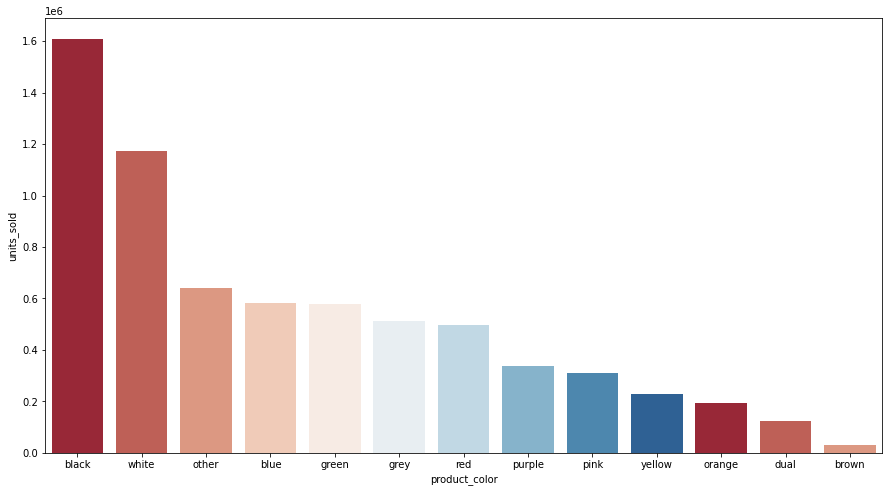

In [28]:
plt.figure(figsize=(15,8))
diverging_colors = sns.color_palette("RdBu", 10)
g = sns.barplot(x="product_color", y="units_sold", data=test, palette=diverging_colors)
# https://rfriend.tistory.com/411

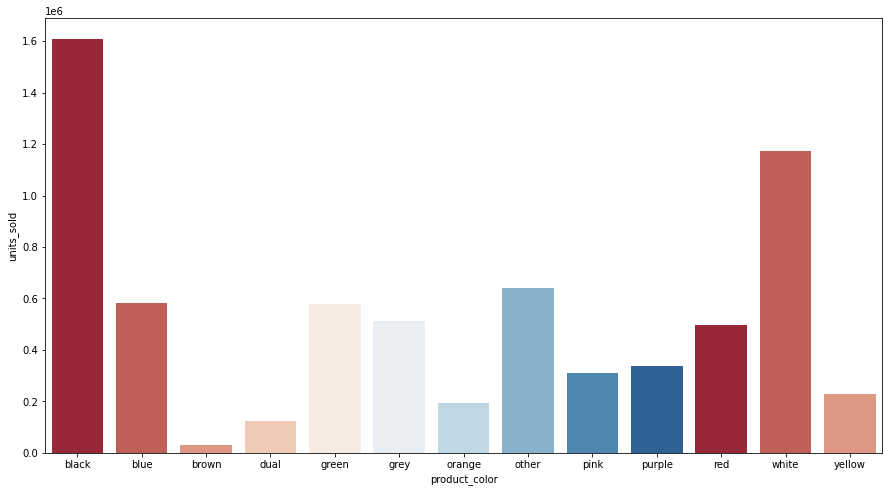

In [29]:
plt.figure(figsize=(15,8))
diverging_colors = sns.color_palette("RdBu", 10)
sns.barplot(x="product_color", y="units_sold", data=color_df, palette=diverging_colors)
# 검은색이 가장 많이 팔리고 흰색이 그다음으로 많이 팔렸다

In [ ]:
# # 명목변수3 tags

In [30]:
df['tags'].isna().sum()

0

In [31]:
df['tags']

0       Summer,Fashion,womenunderwearsuit,printedpajam...
1       Mini,womens dresses,Summer,Patchwork,fashion d...
2       Summer,cardigan,women beachwear,chiffon,Sexy w...
3       Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...
4       Summer,Plus Size,Lace,Casual pants,Bottom,pant...
                              ...                        
1568    bohemia,Plus Size,dandelionfloralprinted,short...
1569    Summer,Panties,Elastic,Lace,Casual pants,casua...
1570    runningshort,Beach Shorts,beachpant,menbeachsh...
1571    Summer,fashion women,Fashion,Lace,Dresses,Dres...
1572    Summer,Leggings,slim,Yoga,pants,Slim Fit,Women...
Name: tags, Length: 1573, dtype: object

In [33]:
df['tags_count'] = df['tags'].apply(lambda x: len(x.split(',')))
df['tags_count']


0       24
1       15
2       19
3       18
4       13
        ..
1568    24
1569    18
1570    12
1571    21
1572    12
Name: tags_count, Length: 1573, dtype: int64

In [ ]:
# 이상치 확인
X = df[df['tags_count']<=10]
col = 'units_sold'
Q1 = X[col].quantile(0.25)
Q3 = X[col].quantile(0.75)
IQR = Q3-Q1
mask = (X[col] > Q3+(IQR*1.5)) | (X[col] < Q1-(IQR*1.5))
X[col][mask]


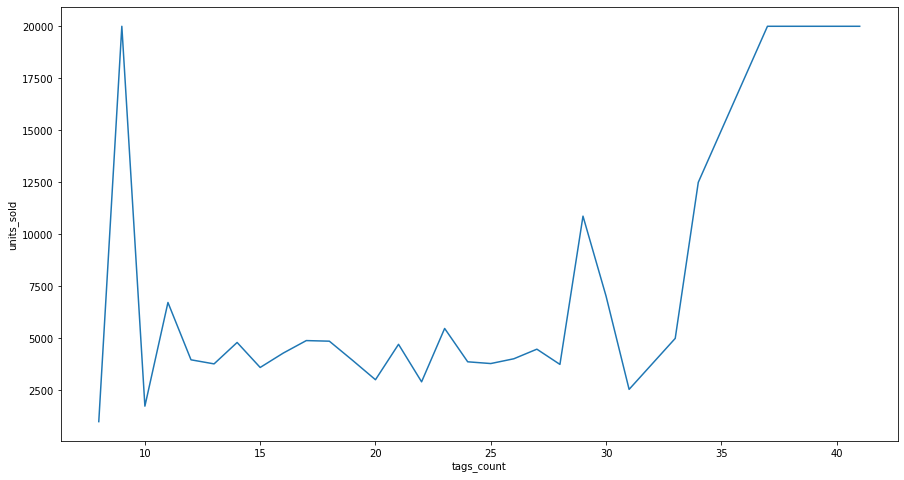

In [34]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x="tags_count", y="units_sold", ci=None)
# 이상치를 제외했을때 태그의 수가 증가할수록 판매가 증가하는 경향이 있다 

In [ ]:
df[df['tags_count']<=10]['units_sold']

5          10
12       1000
42        100
61         50
87      20000
95        100
428        50
460       100
476      5000
527       100
642      5000
663      1000
668       100
683       100
701       100
825       100
921      5000
929       100
1059     1000
1203    20000
1211    20000
1260      100
1343      100
1365       50
1459      100
1501     1000
1526     1000
Name: units_sold, dtype: int64

In [36]:
X = df[df['tags_count']<=10]
col = 'units_sold'

In [42]:
X = df[df['tags_count']<=10]
col = 'units_sold'
Q1 = X[col].quantile(0.25)
Q3 = X[col].quantile(0.75)
IQR = Q3-Q1
mask = (X[col] > Q3+(IQR*1.5)) | (X[col] < Q1-(IQR*1.5))
X[col][mask] = np.nan
X[col] = X[col].fillna(round(X[col][~mask].mean()))
X[col]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

5         10.0
12      1000.0
42       100.0
61        50.0
87       303.0
95       100.0
428       50.0
460      100.0
476      303.0
527      100.0
642      303.0
663     1000.0
668      100.0
683      100.0
701      100.0
825      100.0
921      303.0
929      100.0
1059    1000.0
1203     303.0
1211     303.0
1260     100.0
1343     100.0
1365      50.0
1459     100.0
1501    1000.0
1526    1000.0
Name: units_sold, dtype: float64

In [ ]:
df.loc[df['tags_count'] <=10, 'units_sold'] = X[col]
df[df['tags_count']<=10]['units_sold'] 

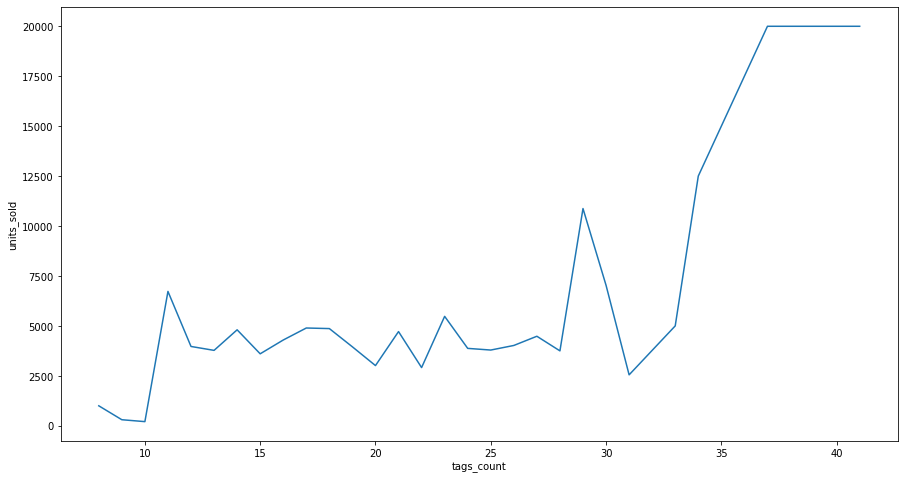

In [49]:

plt.figure(figsize=(15,8))
sns.lineplot(data=df, x="tags_count", y="units_sold", ci=None)

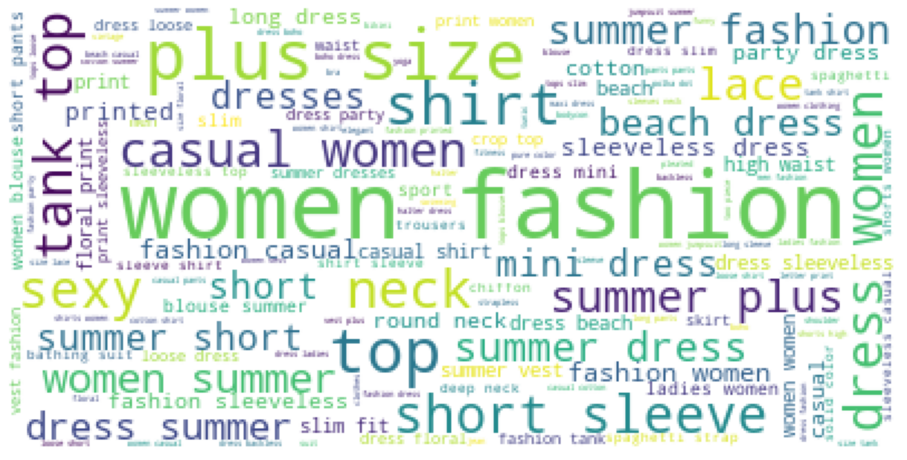

In [51]:
from wordcloud import WordCloud
ustr = " ".join(df['tags'].str.lower().str.split(',').sum())

fig = plt.gcf()
fig.set_size_inches( 16, 10 )
wordcloud = WordCloud(background_color='white').generate(ustr) 
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

명목형 변수 product_variation_size_id

In [52]:
df['product_variation_size_id'].isna().sum() # 결측값 14개 존재

14

In [53]:
df['product_variation_size_id'].unique()
# 사이즈의 고유값이 너무 많아서 대표 고유값으로 변환이 필요하다
# xxxs,xxs,xs,s,m,l,xl,xxl,xxxl,xxxxl,xxxxxl 

array(['M', 'XS', 'S', 'Size-XS', 'M.', 'XXS', 'L', 'XXL', nan, 'S.', 's',
       'choose a size', 'XS.', '32/L', 'Suit-S', 'XXXXXL', 'EU 35', '4',
       'Size S.', '1m by 3m', '3XL', 'Size S', 'XL', 'Women Size 36',
       'US 6.5 (EU 37)', 'XXXS', 'SIZE XS', '26(Waist 72cm 28inch)',
       'Size XXS', '29', '1pc', '100 cm', 'One Size', 'SIZE-4XL', '1',
       'S/M(child)', '2pcs', 'XXXL', 'S..', '30 cm', '5XL', '33',
       'Size M', '100 x 100cm(39.3 x 39.3inch)', '100pcs', '2XL', '4XL',
       'SizeL', 'SIZE XXS', 'XXXXL', 'Base & Top & Matte Top Coat',
       'size S', '35', '34', 'SIZE-XXS', 'S(bust 88cm)',
       'S (waist58-62cm)', 'S(Pink & Black)', '20pcs', 'US-S',
       'Size -XXS', 'X   L', 'White', '25', 'Size-S', 'Round',
       'Pack of 1', '1 pc.', 'S Diameter 30cm', '6XL',
       'AU plug Low quality', '5PAIRS', '25-S', 'Size/S', 'S Pink',
       'Size-5XL', 'daughter 24M', '2', 'Baby Float Boat', '10 ml', '60',
       'Size-L', 'US5.5-EU35', '10pcs', '17', 'Size-XXS

In [54]:
df['product_variation_size_id'].value_counts()

S                    641
XS                   356
M                    200
XXS                  100
L                     49
                    ... 
B                      1
25-S                   1
2                      1
US-S                   1
first  generation      1
Name: product_variation_size_id, Length: 106, dtype: int64

In [55]:
import re
df['product_variation_size_id'].replace(np.nan,'other',inplace=True)
df['product_variation_size_id'].unique()
# nan 값을 other 로 바꾼다

array(['M', 'XS', 'S', 'Size-XS', 'M.', 'XXS', 'L', 'XXL', 'other', 'S.',
       's', 'choose a size', 'XS.', '32/L', 'Suit-S', 'XXXXXL', 'EU 35',
       '4', 'Size S.', '1m by 3m', '3XL', 'Size S', 'XL', 'Women Size 36',
       'US 6.5 (EU 37)', 'XXXS', 'SIZE XS', '26(Waist 72cm 28inch)',
       'Size XXS', '29', '1pc', '100 cm', 'One Size', 'SIZE-4XL', '1',
       'S/M(child)', '2pcs', 'XXXL', 'S..', '30 cm', '5XL', '33',
       'Size M', '100 x 100cm(39.3 x 39.3inch)', '100pcs', '2XL', '4XL',
       'SizeL', 'SIZE XXS', 'XXXXL', 'Base & Top & Matte Top Coat',
       'size S', '35', '34', 'SIZE-XXS', 'S(bust 88cm)',
       'S (waist58-62cm)', 'S(Pink & Black)', '20pcs', 'US-S',
       'Size -XXS', 'X   L', 'White', '25', 'Size-S', 'Round',
       'Pack of 1', '1 pc.', 'S Diameter 30cm', '6XL',
       'AU plug Low quality', '5PAIRS', '25-S', 'Size/S', 'S Pink',
       'Size-5XL', 'daughter 24M', '2', 'Baby Float Boat', '10 ml', '60',
       'Size-L', 'US5.5-EU35', '10pcs', '17', 'Size

In [56]:
pdf = df['product_variation_size_id'].copy()
pdf.unique()

array(['M', 'XS', 'S', 'Size-XS', 'M.', 'XXS', 'L', 'XXL', 'other', 'S.',
       's', 'choose a size', 'XS.', '32/L', 'Suit-S', 'XXXXXL', 'EU 35',
       '4', 'Size S.', '1m by 3m', '3XL', 'Size S', 'XL', 'Women Size 36',
       'US 6.5 (EU 37)', 'XXXS', 'SIZE XS', '26(Waist 72cm 28inch)',
       'Size XXS', '29', '1pc', '100 cm', 'One Size', 'SIZE-4XL', '1',
       'S/M(child)', '2pcs', 'XXXL', 'S..', '30 cm', '5XL', '33',
       'Size M', '100 x 100cm(39.3 x 39.3inch)', '100pcs', '2XL', '4XL',
       'SizeL', 'SIZE XXS', 'XXXXL', 'Base & Top & Matte Top Coat',
       'size S', '35', '34', 'SIZE-XXS', 'S(bust 88cm)',
       'S (waist58-62cm)', 'S(Pink & Black)', '20pcs', 'US-S',
       'Size -XXS', 'X   L', 'White', '25', 'Size-S', 'Round',
       'Pack of 1', '1 pc.', 'S Diameter 30cm', '6XL',
       'AU plug Low quality', '5PAIRS', '25-S', 'Size/S', 'S Pink',
       'Size-5XL', 'daughter 24M', '2', 'Baby Float Boat', '10 ml', '60',
       'Size-L', 'US5.5-EU35', '10pcs', '17', 'Size

In [57]:
# size 지우기
pdf = df['product_variation_size_id'].copy()
for i,st in enumerate(pdf):
  pdf.loc[i] = re.sub(r'size|[\s.,-/]','',st.lower())
pdf.unique()

array(['m', 'xs', 's', 'xxs', 'l', 'xxl', 'other', 'choosea', '32l',
       'suits', 'xxxxxl', 'eu35', '4', '1mby3m', '3xl', 'xl', 'women36',
       'us65(eu37)', 'xxxs', '26(waist72cm28inch)', '29', '1pc', '100cm',
       'one', '4xl', '1', 'sm(child)', '2pcs', 'xxxl', '30cm', '5xl',
       '33', '100x100cm(393x393inch)', '100pcs', '2xl', 'xxxxl',
       'base&top&mattetopcoat', '35', '34', 's(bust88cm)',
       's(waist5862cm)', 's(pink&black)', '20pcs', 'uss', 'white', '25',
       'round', 'packof1', 'sdiameter30cm', '6xl', 'aupluglowquality',
       '5pairs', '25s', 'spink', 'daughter24m', '2', 'babyfloatboat',
       '10ml', '60', 'us55eu35', '10pcs', '17', 'women37',
       '3layeredanklet', '45years', 'firstgeneration', '80x200cm',
       'eu39(us8)', 'basecoat', '36', '043xl', 'pantss',
       'floatingchairforkid', '20pcs10pairs', 'b', '5', '1pcxl', 'h01',
       '40cm'], dtype=object)

In [58]:
for i,st in enumerate(pdf):
  pdf.loc[i] = re.sub(r'(\d)*xl','xl',st)
pdf.unique()  

array(['m', 'xs', 's', 'xxs', 'l', 'xxl', 'other', 'choosea', '32l',
       'suits', 'xxxxxl', 'eu35', '4', '1mby3m', 'xl', 'women36',
       'us65(eu37)', 'xxxs', '26(waist72cm28inch)', '29', '1pc', '100cm',
       'one', '1', 'sm(child)', '2pcs', 'xxxl', '30cm', '33',
       '100x100cm(393x393inch)', '100pcs', 'xxxxl',
       'base&top&mattetopcoat', '35', '34', 's(bust88cm)',
       's(waist5862cm)', 's(pink&black)', '20pcs', 'uss', 'white', '25',
       'round', 'packof1', 'sdiameter30cm', 'aupluglowquality', '5pairs',
       '25s', 'spink', 'daughter24m', '2', 'babyfloatboat', '10ml', '60',
       'us55eu35', '10pcs', '17', 'women37', '3layeredanklet', '45years',
       'firstgeneration', '80x200cm', 'eu39(us8)', 'basecoat', '36',
       'pantss', 'floatingchairforkid', '20pcs10pairs', 'b', '5', '1pcxl',
       'h01', '40cm'], dtype=object)

In [59]:
def change_size(cl):
    if cl in 'xxxs,xxs,xs,s,m,l,xl,xxl,xxxl,xxxxl,xxxxxl'.split(','):
        return cl
    else:
        return 'other'
df['product_variation_size_id'] = pdf.apply(change_size)

In [60]:
df['product_variation_size_id'].unique()

array(['m', 'xs', 's', 'xxs', 'l', 'xxl', 'other', 'xxxxxl', 'xl', 'xxxs',
       'xxxl', 'xxxxl'], dtype=object)

In [61]:
df['product_variation_size_id'].value_counts()

s         680
xs        369
m         206
xxs       107
other      94
l          54
xl         37
xxl        15
xxxs        6
xxxxxl      2
xxxxl       2
xxxl        1
Name: product_variation_size_id, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


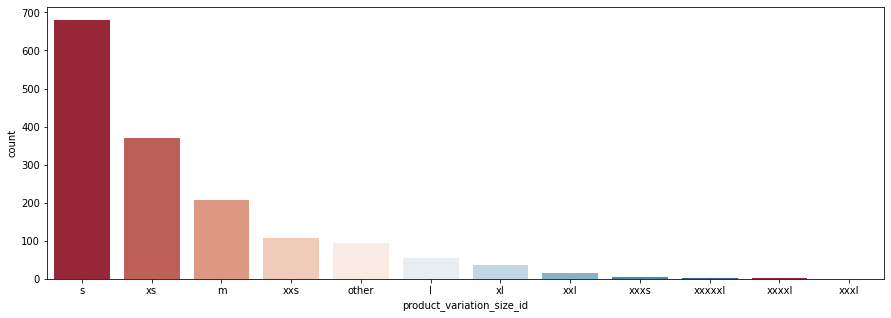

In [62]:
plt.figure(figsize=(15,5))
diverging_colors = sns.color_palette("RdBu", 10)
sns.countplot('product_variation_size_id',
              order = df['product_variation_size_id'].value_counts().index,
              data = df, palette=diverging_colors)
plt.show()

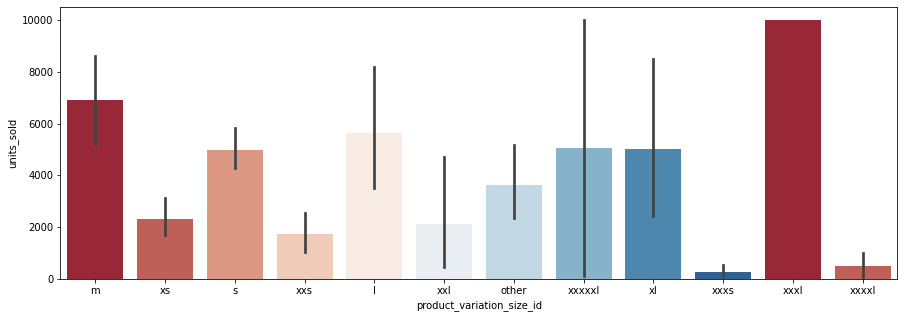

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
diverging_colors = sns.color_palette("RdBu", 10)
sns.barplot(x="product_variation_size_id", y="units_sold", data=df, ci=95, palette=diverging_colors) 
# 사이즈당 평균 판매량
# 그래프 상단의 검은 줄은 ci, 즉 confidence intervals(신뢰구간)을 말합니다. 기본값은 95이므로 95 신뢰구간을 의미합니다

In [64]:
df.groupby('product_variation_size_id')['units_sold'].agg(['sum','count','mean']).sort_values(by='mean', ascending=False)

,sum,count,mean
product_variation_size_id,,,
xxxl,10000.0,1,10000.000000
m,1425437.0,206,6919.597087
l,305253.0,54,5652.833333
xxxxxl,10100.0,2,5050.000000
xl,185000.0,37,5000.000000
s,3398045.0,680,4997.125000
other,339822.0,94,3615.127660
xs,856908.0,369,2322.243902
xxl,31610.0,15,2107.333333


In [65]:
df[df['product_variation_size_id']=='xxxl']

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month,tags_count
361,4 Couleur Nouvelle Arrivée Mode Décontractée p...,4 Color New Arrival Women's Fashion Casual Sex...,5.68,7,EUR,10000.0,0,3.89,1232,588.0,250.0,188.0,81.0,125.0,0,0,0,0,"Women Vest,Vest,Plus Size,tunic top,Summer,Sli...",blue,xxxl,50,Livraison standard,1,0,41,50,0.0,NaN,CN,nanguoguan,nanguoguan,"87 % avis positifs (7,544 notes)",7544,4.05448,5b6bb9c8dd0d902d18928318,0,NaN,https://www.wish.com/c/5c40402ec4dae35993974402,https://contestimg.wish.com/api/webimage/5c404...,5c40402ec4dae35993974402,summer,2020-08,27


In [ ]:
# 명목형 변수 shipping_option_name

In [66]:
df.groupby('shipping_option_name')['units_sold'].agg(['count','sum','mean'])

,count,sum,mean
shipping_option_name,,,
Ekspresowa wysyłka,1,10000.0,10000.000000
Envio Padrão,9,22400.0,2488.888889
Envío normal,5,16100.0,3220.000000
Expediere Standard,6,2400.0,400.000000
Livraison Express,3,1200.0,400.000000
Livraison standard,1508,6557220.0,4348.289125
Spedizione standard,2,1100.0,550.000000
Standard Shipping,21,88550.0,4216.666667
Standardowa wysyłka,3,10403.0,3467.666667


In [67]:
df.urgency_text.value_counts()

Quantité limitée !                  472
Réduction sur les achats en gros      1
Name: urgency_text, dtype: int64

In [ ]:
# 명목형 변수 origin_country

In [68]:
df['origin_country'].isna().sum()

17

In [69]:
df.groupby('origin_country')['units_sold'].agg(['count', 'sum'])

,count,sum
origin_country,,
AT,1,100.0
CN,1516,6582760.0
GB,1,1000.0
SG,2,20100.0
US,31,43560.0
VE,5,350.0


In [70]:
df['origin_country'].mode()[0]

'CN'

In [71]:
df[df['origin_country'].isna()].head(3)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month,tags_count
56,Nouvelle mode d'été femmes robe décontractée c...,New Fashion Summer Women Casual Dress Round Ne...,1.00,10,EUR,100.0,0,3.56,52,22.0,8.0,9.0,3.0,10.0,0,0,0,0,"Summer,Fashion,Necks,Beach,Dress,Loose,beach d...",white,xxs,2,Livraison standard,1,0,40,50,1.0,Quantité limitée !,NaN,Maryswill,maryswill,"81 % avis positifs (91,631 notes)",91631,3.837937,5268759b736046671957190c,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/5e81acbde187530740f207c6,https://contestimg.wish.com/api/webimage/5e81a...,5e81acbde187530740f207c6,summer,2020-08,13
180,"Pantalon à lacets à la mode pour femmes d'été,...",Summer Women s Fashion Lace Up Tie Pants Pl...,3.78,4,EUR,1000.0,1,3.35,79,30.0,13.0,11.0,5.0,20.0,0,0,0,0,"Summer,Shorts,high waist shorts,high waist,Cas...",red,xs,1,Livraison standard,1,0,38,50,0.0,NaN,NaN,Maxnina,maxnina,"(105,015 notes)",105015,3.789601,5177b0b63feb620dd802a197,0,NaN,https://www.wish.com/c/5dde07c651fe4539f9c3ee70,https://contestimg.wish.com/api/webimage/5dde0...,5dde07c651fe4539f9c3ee70,summer,2020-08,17
498,Fashion Women Back Deep V V Sexy Gilet sans do...,Fashion Women Back Deep V Sexy Backless Vest T...,7.00,13,EUR,50000.0,1,3.35,9075,2998.0,1514.0,1827.0,1136.0,1600.0,0,0,0,0,"Vest,womens top,Tank,Tops,slim,T Shirts,Womens...",grey,s,50,Livraison standard,2,0,40,50,0.0,NaN,NaN,freebird,fashionshow,"(839,882 notes)",839882,4.103760,52bd3ddb34067e4620a4c62d,0,NaN,https://www.wish.com/c/552f840fcea30816e52aabcf,https://contestimg.wish.com/api/webimage/552f8...,552f840fcea30816e52aabcf,summer,2020-08,14


In [72]:
# 결측치를 최빈값으로 대체
df['origin_country'].fillna(df['origin_country'].mode()[0], inplace=True)
df['origin_country'].isna().sum()

0

In [73]:
df['units_sold'].describe()

count      1573.000000
mean       4292.481246
std        9334.663077
min           1.000000
25%         100.000000
50%        1000.000000
75%        5000.000000
max      100000.000000
Name: units_sold, dtype: float64

In [74]:
df.units_sold.unique()

array([1.00e+02, 2.00e+04, 5.00e+03, 1.00e+01, 5.00e+04, 1.00e+03,
       1.00e+04, 1.00e+05, 5.00e+01, 3.03e+02, 1.00e+00, 7.00e+00,
       2.00e+00, 3.00e+00, 8.00e+00, 6.00e+00])

In [77]:
factor_col_2 = pd.qcut(df.units_sold, 4)
grouped_col_2 = df.units_sold.groupby(factor_col_2)
grouped_col_2.agg(['count', 'mean', 'std', 'min', 'max'])


,count,mean,std,min,max
units_sold,,,,,
"(0.999, 100.0]",648,85.270062,29.778205,1.0,100.0
"(100.0, 1000.0]",411,989.824818,83.699541,303.0,1000.0
"(1000.0, 5000.0]",214,5000.000000,0.000000,5000.0,5000.0
"(5000.0, 100000.0]",300,17400.000000,15231.985357,10000.0,100000.0


In [78]:
df['units_sold'].isna().sum()

0

In [79]:
# 수치형 데이터 (타겟컬럼)
# 제품의 판매 수를 예측하는 것이 아니라 해당 플랫폼에서 제품이 성공적이었는지 여부를 예측하고자 하기에
# 중위수가 1000입니다. 따라서 우리는 제품이 1000개 이상의 매출을 올릴 경우 성공적이라고 간주

df['success'] = df['units_sold'].apply(lambda x: 1 if x>1000 else 0)
df['success']

0       0
1       1
2       0
3       1
4       0
       ..
1568    1
1569    0
1570    0
1571    0
1572    0
Name: success, Length: 1573, dtype: int64

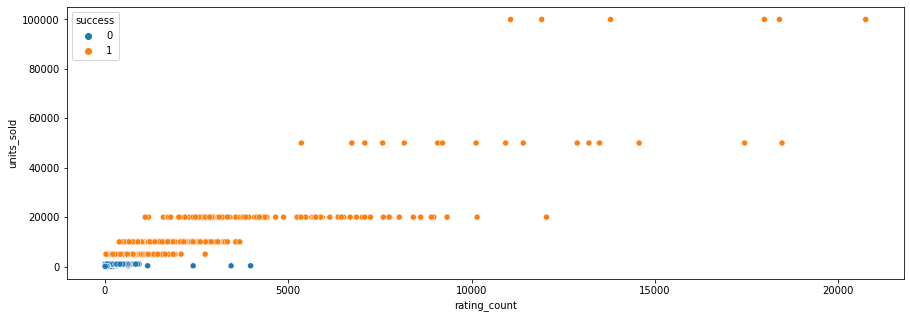

In [80]:

plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x="rating_count", y="units_sold", hue='success', sizes=(10, 200))

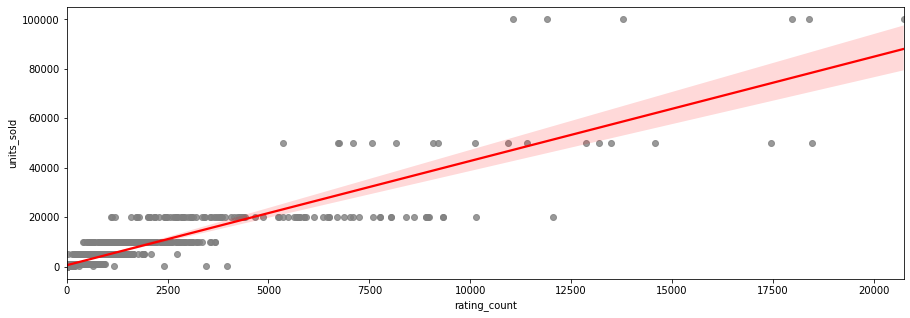

In [81]:
plt.figure(figsize=(15,5))
sns.regplot(data=df, x="rating_count", y="units_sold",
            line_kws={'color': 'red'}, scatter_kws={'color': 'grey'})

# 선의 위아래로 옅게 표시된 부분은 추세선의 95% 신뢰구간을 나타냅니다.
# 평점의 수가 많을수록 성공 판매량이 증가한다 


In [82]:
df.isna().sum()
#rating_five_count                 45
#rating_four_count                 45
#rating_three_count                45
#rating_two_count                  45
#rating_one_count                  45

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                      0
product_variation_size_id          0
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [83]:
df['rating_count']

0         54
1       6135
2         14
3        579
4         20
        ... 
1568    1367
1569      28
1570      59
1571       2
1572      14
Name: rating_count, Length: 1573, dtype: int64

In [84]:

# 시리즈끼리 연산을 할때 한쪽이라도 NaN 값이면 그쪽은 NaN 값이다
# 각 점수의 카운트를 다 더하면 전체 rating_count가 된다 -> 결측값은 45개가 모두 동일한 위치에 있는데 별점을 안준거다

a = df['rating_five_count']+df['rating_four_count']+df['rating_three_count']+df['rating_two_count']+df['rating_one_count']
a

0         54.0
1       6135.0
2         14.0
3        579.0
4         20.0
         ...  
1568    1367.0
1569      28.0
1570      59.0
1571       2.0
1572      14.0
Length: 1573, dtype: float64

In [ ]:
df['rating'].isna().sum()

0

In [85]:
df.update(df[['rating_five_count', 'rating_four_count', 'rating_three_count','rating_two_count', 'rating_one_count']].fillna(0))


In [86]:
df.loc[df['rating_count']==0, 'rating'] = 0
df.loc[df['rating_count']==0, :]
# rating = 5x5cnt + 4x4cnt +.../ rating_count
# rating_count가 0 이라는 것은 0점을 줫다는 것이다.

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month,tags_count,success
74,Fashion Women Sleeveless Lace Vest Loose V Nec...,Fashion Women Sleeveless Lace Vest Loose V Nec...,8.00,33,EUR,10.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,"Vest,Fashion,Lace,V-neck,Women's Fashion,laceb...",black,s,50,Livraison standard,2,0,25,50,0.0,NaN,CN,WSLCWM,wslcwm,"88 % avis positifs (1,496 notes)",1496,4.169786,592955ef980a346d826f7bfc,0,NaN,https://www.wish.com/c/5ed0dfc51fa8446451b19c0d,https://contestimg.wish.com/api/webimage/5ed0d...,5ed0dfc51fa8446451b19c0d,summer,2020-08,19,0
112,Womens Summer Fashion Lip Print 2pc Set Ladies...,Womens Summer Fashion Lip Print 2pc Set Ladies...,5.00,51,EUR,10.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,"Summer,Shorts,Shirt,Sleeve,sportsset,short sle...",black,xs,1,Livraison standard,1,0,36,50,0.0,NaN,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5eb90ab5ad67f63678d15ed9,https://contestimg.wish.com/api/webimage/5eb90...,5eb90ab5ad67f63678d15ed9,summer,2020-08,19,0
126,Women's Casual Sleeveless Stripe T Shirts Dres...,Women's Casual Sleeveless Stripe T Shirts Dres...,2.72,9,EUR,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,"Summer,Plus Size,Shirt,long dress,Dress,Women'...",orange,xs,1,Livraison standard,1,0,33,50,0.0,NaN,CN,Kyiswen,kyiswen,75 % avis positifs (378 notes),378,3.597884,5d417e7070327a2743021677,0,NaN,https://www.wish.com/c/5ed3ae8e7bf8821d5cf4bc64,https://contestimg.wish.com/api/webimage/5ed3a...,5ed3ae8e7bf8821d5cf4bc64,summer,2020-08,17,0
189,Jupe de tennis plissée extensible Active Skort...,Women's Active Skort Athletic Stretchy Pleated...,5.00,5,EUR,10.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,"ladies skort,running skirt,summer skirt,Golf,s...",white,s,50,Livraison standard,2,0,8,50,1.0,Quantité limitée !,CN,renpingping,renpingping,80 % avis positifs (129 notes),129,3.837209,5a3231f2e62bbc45b0bda1dd,0,NaN,https://www.wish.com/c/5ed1c059630f990d1d44592c,https://contestimg.wish.com/api/webimage/5ed1c...,5ed1c059630f990d1d44592c,summer,2020-08,18,0
216,Women's Sexy Push Up Bikini Sexy Vintage Set S...,Women's Sexy Push Up Bikini Vintage Set Sexy B...,11.00,30,EUR,10.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,"woman fashion,Fashion,outside,Vintage,sexy bik...",other,s,50,Livraison standard,3,0,78,50,1.0,Quantité limitée !,CN,YIWU SHI AO HANG DIAN ZI SHANG WU YOU XIAN GON...,yiwushiaohangdianzishangwuyouxiangongsi,"91 % avis positifs (22,621 notes)",22621,4.295124,56025ed8293a5b2d24779bde,0,NaN,https://www.wish.com/c/573db9316b335c34ca0513b8,https://contestimg.wish.com/api/webimage/573db...,573db9316b335c34ca0513b8,summer,2020-08,13,0
248,Mode d'été Tie-Dye manches courtes robe longue...,Summer Fashion Tie-Dye Short Sleeve Long Dress...,8.00,9,EUR,7.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,"Summer,summer dress,Necks,Sleeve,long dress,pl...",orange,xxs,5,Livraison standard,3,0,38,50,0.0,NaN,CN,"SHENZHEN LONGDRAGON TECHNOLOGY CO.,LTD",shenzhenlongdragontechnologycoltd,"87 % avis positifs (108,048 notes)",108048,4.052504,5417aada4ad3ab27e954b76c,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/5e8d70549f1504449514c8b9,https://contestimg.wish.com/api/webimage/5e8d7...,5e8d70549f1504449514c8b9,summer,2020-08,19,0
309,Dames d'été Tie Dye Imprimer manches courtes h...,Ladies Summer Tie Dye Print Short Sle

In [87]:
df.isna().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                  0
rating_four_count                  0
rating_three_count                 0
rating_two_count                   0
rating_one_count                   0
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                      0
product_variation_size_id          0
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [88]:
df['rating_count']

0         54
1       6135
2         14
3        579
4         20
        ... 
1568    1367
1569      28
1570      59
1571       2
1572      14
Name: rating_count, Length: 1573, dtype: int64

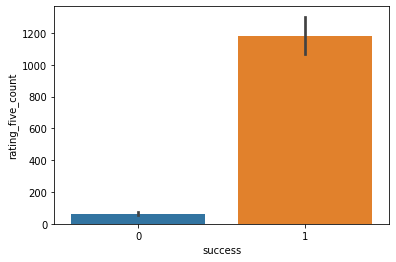

In [89]:
sns.barplot(x='success', y='rating_five_count', data=df)

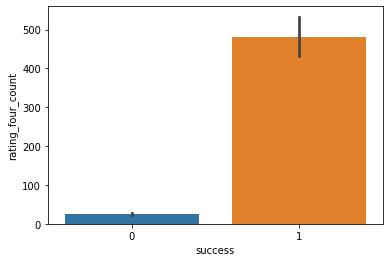

In [90]:
sns.barplot(x='success', y='rating_four_count', data=df)

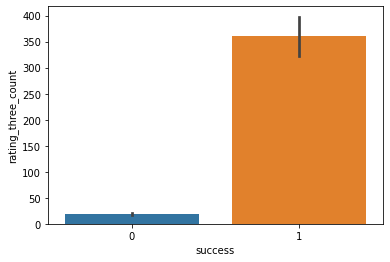

In [91]:
sns.barplot(x='success', y='rating_three_count', data=df)

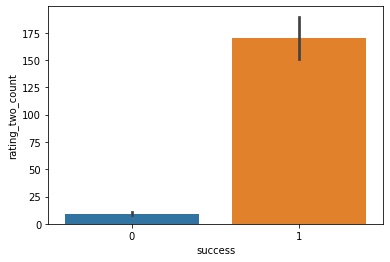

In [92]:
sns.barplot(x='success', y='rating_two_count', data=df)

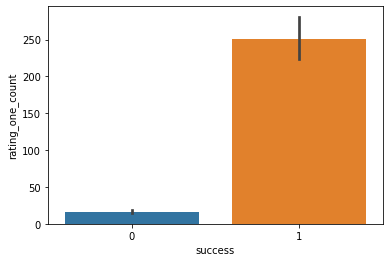

In [93]:
sns.barplot(x='success', y='rating_one_count', data=df)

In [94]:
df.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month', 'tags_count', 'success'],
      dtype='object')

In [95]:
cnt_df = df.loc[:,'rating_count':'rating_one_count']
cnt_df

,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count
0,54,26.0,8.0,10.0,1.0,9.0
1,6135,2269.0,1027.0,1118.0,644.0,1077.0
2,14,5.0,4.0,2.0,0.0,3.0
3,579,295.0,119.0,87.0,42.0,36.0
4,20,6.0,4.0,2.0,2.0,6.0
...,...,...,...,...,...,...
1568,1367,722.0,293.0,185.0,77.0,90.0
1569,28,11.0,3.0,1.0,3.0,10.0
1570,59,24.0,15.0,8.0,3.0,9.0
1571,2,0.0,1.0,0.0,0.0,1.0


In [96]:
cnt_df.isna().sum()

rating_count          0
rating_five_count     0
rating_four_count     0
rating_three_count    0
rating_two_count      0
rating_one_count      0
dtype: int64

In [97]:
cnt_df['rating_count']

0         54
1       6135
2         14
3        579
4         20
        ... 
1568    1367
1569      28
1570      59
1571       2
1572      14
Name: rating_count, Length: 1573, dtype: int64

In [98]:
val = cnt_df.iloc[:,1:].values / cnt_df['rating_count'].values.reshape(-1,1) # 브로드캐스팅 이용
val

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[0.48148148, 0.14814815, 0.18518519, 0.01851852, 0.16666667],
       [0.36984515, 0.16740016, 0.18223309, 0.10497148, 0.17555012],
       [0.35714286, 0.28571429, 0.14285714, 0.        , 0.21428571],
       ...,
       [0.40677966, 0.25423729, 0.13559322, 0.05084746, 0.15254237],
       [0.        , 0.5       , 0.        , 0.        , 0.5       ],
       [0.57142857, 0.21428571, 0.07142857, 0.        , 0.14285714]])

In [99]:
cnt_df.iloc[:,1:] = val

cnt_df.isna().sum() # 0 으로 나눈값들이 NaN 값으로 들어간다

cnt_df.fillna(0)

,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count
0,54,0.481481,0.148148,0.185185,0.018519,0.166667
1,6135,0.369845,0.167400,0.182233,0.104971,0.175550
2,14,0.357143,0.285714,0.142857,0.000000,0.214286
3,579,0.509499,0.205527,0.150259,0.072539,0.062176
4,20,0.300000,0.200000,0.100000,0.100000,0.300000
...,...,...,...,...,...,...
1568,1367,0.528164,0.214338,0.135333,0.056328,0.065838
1569,28,0.392857,0.107143,0.035714,0.107143,0.357143
1570,59,0.406780,0.254237,0.135593,0.050847,0.152542
1571,2,0.000000,0.500000,0.000000,0.000000,0.500000


In [100]:
df.loc[:,'rating_count':'rating_one_count'] = cnt_df.fillna(0)

In [101]:
df.rename(columns = {"rating_five_count": "rating_five_prob",
                    "rating_four_count": "rating_four_prob",
                    "rating_three_count": "rating_three_prob",
                     "rating_two_count": "rating_two_prob",
                     "rating_one_count": "rating_one_prob"}, inplace=True)
df

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_prob,rating_four_prob,rating_three_prob,rating_two_prob,rating_one_prob,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month,tags_count,success
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100.0,0,3.76,54,0.481481,0.148148,0.185185,0.018519,0.166667,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,m,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08,24,0
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000.0,1,3.45,6135,0.369845,0.167400,0.182233,0.104971,0.175550,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,xs,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08,15,1
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100.0,0,3.57,14,0.357143,0.285714,0.142857,0.000000,0.214286,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",other,xs,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08,19,0
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000.0,1,4.03,579,0.509499,0.205527,0.150259,0.072539,0.062176,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,m,50,Livraison standard,2,0,41,50,0.0,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08,18,1
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100.0,1,3.10,20,0.300000,0.200000,0.100000,0.100000,0.300000,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,s,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000.0,1,4.08,1367,0.528164,0.214338,0.135333,0.056328,0.065838,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",blue,s,50,Livraison standard,2,0,41,50,0.0,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52e

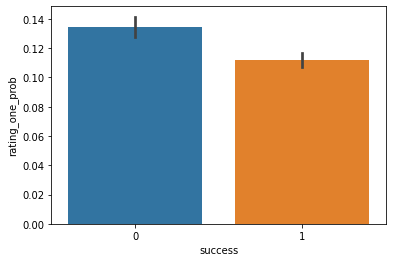

In [102]:
sns.barplot(x='success', y='rating_one_prob', data=df)

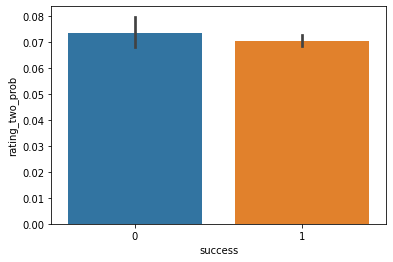

In [103]:
sns.barplot(x='success', y='rating_two_prob', data=df)

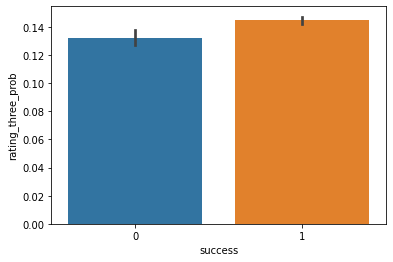

In [104]:
sns.barplot(x='success', y='rating_three_prob', data=df)

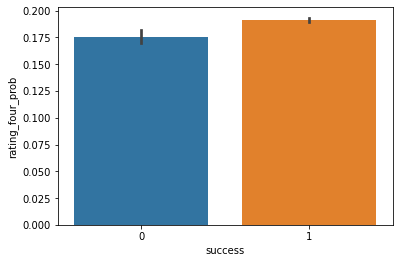

In [105]:
sns.barplot(x='success', y='rating_four_prob', data=df)

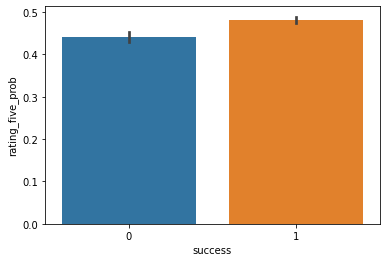

In [106]:
sns.barplot(x='success', y='rating_five_prob', data=df)

In [107]:
# merchant_rating_count

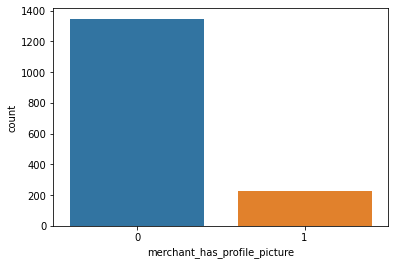

In [108]:
sns.countplot(x='merchant_has_profile_picture', data=df)

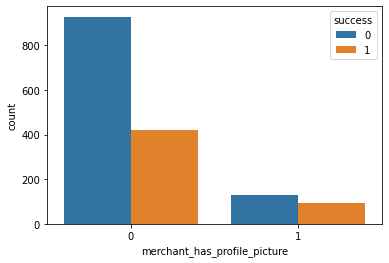

In [109]:
sns.countplot(x='merchant_has_profile_picture',hue='success', data=df)

In [113]:
df[df['merchant_has_profile_picture']==0]['success'].sum() / len(df[df['merchant_has_profile_picture']==0])
# 422/1347  # 판매자가 자신의 프로필 사진이 없을 경우 성공확률은 31.32%

0.3110616184112843

In [114]:
df.loc[df['merchant_has_profile_picture']==1, 'success'].sum() / len(df[df['merchant_has_profile_picture']==1])
# 98/226  # 판매자가 자신의 프로필 사진을 가지고 있을 경우 성공확률을 43.36%

0.42035398230088494

In [111]:
df['success'].value_counts()

0    1059
1     514
Name: success, dtype: int64

In [112]:
df.groupby('success')['merchant_rating'].agg(['mean','std'])
# 성공하는 제품의 판매자 평점은 그렇지 않은 판매자보다 평균적으로 높고 편차 또한 크지 않다

,mean,std
success,,
0,4.007539,0.223787
1,4.083453,0.145993


In [115]:
df['has_urgency_banner'].isna().sum() # 위에서 결측처리함 있으면 1이고 없으면 NaN 이어서 NaN -> 0 으로 치환함

0

In [116]:
df.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_prob', 'rating_four_prob', 'rating_three_prob',
       'rating_two_prob', 'rating_one_prob', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month', 'tags_count', 'success'],
      dtype='object')

In [117]:
df = df.drop(['crawl_month','product_id','product_picture', 'product_url', 'merchant_profile_picture', 'merchant_id',
              'currency_buyer', 'theme','urgency_text', 'merchant_title', 'merchant_name', 'merchant_info_subtitle',
              'title','title_orig','tags', 'shipping_option_name', 'inventory_total' , 'badge_fast_shipping',
              'badge_local_product' , 'shipping_is_express', 'units_sold'], axis = 1)
df.columns

Index(['price', 'retail_price', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_prob', 'rating_four_prob', 'rating_three_prob',
       'rating_two_prob', 'rating_one_prob', 'badges_count',
       'badge_product_quality', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_price',
       'countries_shipped_to', 'has_urgency_banner', 'origin_country',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'tags_count', 'success'],
      dtype='object')

In [118]:
df.shape

(1573, 24)

In [119]:
df = pd.get_dummies(df, 
                    columns = ['product_color'],
                    prefix = 'color_',
                    drop_first = True)
df.columns

Index(['price', 'retail_price', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_prob', 'rating_four_prob', 'rating_three_prob',
       'rating_two_prob', 'rating_one_prob', 'badges_count',
       'badge_product_quality', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_price',
       'countries_shipped_to', 'has_urgency_banner', 'origin_country',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'tags_count', 'success', 'color__blue',
       'color__brown', 'color__dual', 'color__green', 'color__grey',
       'color__orange', 'color__other', 'color__pink', 'color__purple',
       'color__red', 'color__white', 'color__yellow'],
      dtype='object')

In [120]:
df = pd.get_dummies(df, 
                    columns = ['product_variation_size_id'],
                    prefix = 'size',
                    drop_first = True)
df.columns

Index(['price', 'retail_price', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_prob', 'rating_four_prob', 'rating_three_prob',
       'rating_two_prob', 'rating_one_prob', 'badges_count',
       'badge_product_quality', 'product_variation_inventory',
       'shipping_option_price', 'countries_shipped_to', 'has_urgency_banner',
       'origin_country', 'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'tags_count', 'success', 'color__blue',
       'color__brown', 'color__dual', 'color__green', 'color__grey',
       'color__orange', 'color__other', 'color__pink', 'color__purple',
       'color__red', 'color__white', 'color__yellow', 'size_m', 'size_other',
       'size_s', 'size_xl', 'size_xs', 'size_xxl', 'size_xxs', 'size_xxxl',
       'size_xxxs', 'size_xxxxl', 'size_xxxxxl'],
      dtype='object')

In [121]:
df = pd.get_dummies(df, 
                    columns = ['origin_country'],
                    prefix = 'country',
                    drop_first = True)
df.columns

Index(['price', 'retail_price', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_prob', 'rating_four_prob', 'rating_three_prob',
       'rating_two_prob', 'rating_one_prob', 'badges_count',
       'badge_product_quality', 'product_variation_inventory',
       'shipping_option_price', 'countries_shipped_to', 'has_urgency_banner',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'tags_count', 'success', 'color__blue',
       'color__brown', 'color__dual', 'color__green', 'color__grey',
       'color__orange', 'color__other', 'color__pink', 'color__purple',
       'color__red', 'color__white', 'color__yellow', 'size_m', 'size_other',
       'size_s', 'size_xl', 'size_xs', 'size_xxl', 'size_xxs', 'size_xxxl',
       'size_xxxs', 'size_xxxxl', 'size_xxxxxl', 'country_CN', 'country_GB',
       'country_SG', 'country_US', 'country_VE'],
      dtype='object')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   uses_ad_boosts                1573 non-null   int64  
 3   rating                        1573 non-null   float64
 4   rating_count                  1573 non-null   int64  
 5   rating_five_prob              1573 non-null   float64
 6   rating_four_prob              1573 non-null   float64
 7   rating_three_prob             1573 non-null   float64
 8   rating_two_prob               1573 non-null   float64
 9   rating_one_prob               1573 non-null   float64
 10  badges_count                  1573 non-null   int64  
 11  badge_product_quality         1573 non-null   int64  
 12  product_variation_inventory   1573 non-null   int64  
 13  shi

In [123]:
X = df.drop(['success'], axis=1)
y = df['success']

print(X.shape)
print(y.shape)

(1573, 48)
(1573,)


In [124]:
print( y.value_counts() )
print( y.value_counts() / len(y.values) )

0    1059
1     514
Name: success, dtype: int64
0    0.673236
1    0.326764
Name: success, dtype: float64


In [125]:
len(y.values)

1573

In [126]:
########## 모델 생성 ################ 1 

X = df.drop(['success'], axis=1)
y = df['success']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

## 샘플링 편향이 발생하지 않도록 정답라벨을 stratify=y 로 traindata 와 test 데이터에 골고루 분배한다 ##

In [127]:
### stratify=y 없을 때 ###
print( y_train.value_counts() / len(y_train.values) )
print( y_test.value_counts() / len(y_test.values) )

0    0.673291
1    0.326709
Name: success, dtype: float64
0    0.673016
1    0.326984
Name: success, dtype: float64


In [128]:
### stratify=y 있을 때 -> 처음 데이터의 클래스 비율을 유지하면서 훈련 데이터, 테스트 데이터를 나눈다  ###
print( y_train.value_counts() / len(y_train.values) )
print( y_test.value_counts() / len(y_test.values) )

0    0.673291
1    0.326709
Name: success, dtype: float64
0    0.673016
1    0.326984
Name: success, dtype: float64


In [131]:
########## 모델 생성 ################ 1 (로지스틱회귀)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score

X = df.drop(['success'], axis=1)
y = df['success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

sc = StandardScaler()
train_scaled = sc.fit_transform(X_train)
test_scaled = sc.transform(X_test)

model = LogisticRegression(max_iter=1000,C=1.0)
model.fit(train_scaled, y_train)
result = model.predict(test_scaled)

##### 모델 평가 #####

print("훈련데이터 정확도", model.score(train_scaled, y_train))
print("테스트데이터 정확도", model.score(test_scaled, y_test))

tn, fp, fn, tp = confusion_matrix(y_test, result).ravel()
precision = tp / (tp+fp)
recall = sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)

print('카파통계량', cohen_kappa_score(y_test, result))
print('정밀도', precision)
print('재현율', recall)
print('민감도', sensitivity)
print('특이도', specificity)

훈련데이터 정확도 0.9395866454689984
테스트데이터 정확도 0.9428571428571428
카파통계량 0.8668451458362688
정밀도 0.956989247311828
재현율 0.8640776699029126
민감도 0.8640776699029126
특이도 0.9811320754716981


In [134]:
########## 모델 생성 ################ 2 (로지스틱회귀 + 교차검증)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

X = df.drop(['success'], axis=1)
y = df['success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

model1 = LogisticRegression(random_state=1)
pipe = make_pipeline(StandardScaler(), model1)
cvr = cross_validate(pipe, X_train, y_train, 
                        return_train_score=True, cv=10)

model1.fit(X_train,y_train)
result = model1.predict(X_test)
##### 모델 평가 #####

print("훈련데이터 정확도", np.mean(cvr['train_score']))
print("검증데이터 정확도", np.mean(cvr['test_score']))
print("테스트데이터 정확도", model1.score(X_test, y_test))

tn, fp, fn, tp = confusion_matrix(y_test, result).ravel()
precision = tp / (tp+fp)
recall = sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)

print('카파통계량', cohen_kappa_score(y_test, result))
print('정밀도', precision)
print('재현율', recall)
print('민감도', sensitivity)
print('특이도', specificity)


훈련데이터 정확도 0.9392332966357806
검증데이터 정확도 0.9260698412698414
테스트데이터 정확도 0.9428571428571428
카파통계량 0.8695171905923506
정밀도 0.9207920792079208
재현율 0.9029126213592233
민감도 0.9029126213592233
특이도 0.9622641509433962


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print(X_train.shape)
print(X_train.values[[1,2,5,6],:].shape)

(1258, 48)
(4, 48)


In [137]:
########## 모델 생성 ################ 3 (로지스틱회귀 + Stratified KFold)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold

X = df.drop(['success'], axis=1).values
y = df['success'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

cv= StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
kfold = cv.split(X_train, y_train)

r3 = LogisticRegression(random_state=1)
pipeline = make_pipeline(StandardScaler(), r3)

train_scores = []
val_scores = []
for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train[train,:], y_train[train])
    train_score = pipeline.score(X_train[train,:], y_train[train])
    val_score = pipeline.score(X_train[test,:], y_train[test])
    train_scores.append(train_score)
    val_scores.append(val_score)

result = pipeline.predict(X_test)
print("훈련데이터 정확도",np.mean(train_scores))
print("검증데이터 정확도",np.mean(val_scores)) 
print("테스트데이터 정확도",pipeline.score(X_test, y_test)) 

tn, fp, fn, tp = confusion_matrix(y_test, result).ravel()
accuracy = accuracy_score(y_test, result)
print('카파통계량', cohen_kappa_score(y_test, result))

precision = tp / (tp+fp)
recall = sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)

print('정밀도', precision)
print('재현율', recall)
print('민감도', sensitivity)
print('특이도', specificity)


훈련데이터 정확도 0.9385266608241668
검증데이터 정확도 0.9276380952380954
테스트데이터 정확도 0.9492063492063492
카파통계량 0.8816401296322389
정밀도 0.967741935483871
재현율 0.8737864077669902
민감도 0.8737864077669902
특이도 0.9858490566037735


In [140]:
########## 모델 생성 ################ 4 (의사결정트리 + GridSerach)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X = df.drop(['success'], axis=1).values
y = df['success'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)


# GridSearchCV의 param_grid 설정
params = {
    'max_depth': [2, 3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 4]
}

dtc = DecisionTreeClassifier()

grid_tree = GridSearchCV(dtc, param_grid=params, cv=3, refit=True,  return_train_score=True)
grid_tree.fit(X_train, y_train)

print(grid_tree.cv_results_.keys())
print("훈련데이터 정확도", np.mean(grid_tree.cv_results_['mean_train_score']))
print("검증데이터 정확도", np.mean(grid_tree.cv_results_['mean_test_score']))
print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)
em1 = grid_tree.best_estimator_
result = em1.predict(X_test)

print("테스트데이터 정확도", em1.score(X_test, y_test))
tn, fp, fn, tp = confusion_matrix(y_test, result).ravel()
accuracy = accuracy_score(y_test, result)
precision = tp / (tp+fp)
recall = sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)

print('카파통계량', cohen_kappa_score(y_test, result))
print('정밀도', precision)
print('재현율', recall)
print('민감도', sensitivity)
print('특이도', specificity)

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])
훈련데이터 정확도 0.9677618868964972
검증데이터 정확도 0.9265610991147984
best parameters :  {'max_depth': 3, 'min_samples_split': 2}
best score :  0.9348240330340568
테스트데이터 정확도 0.946031746031746
카파통계량 0.8739199020554235
정밀도 0.967391304347826
재현율 0.8640776699029126
민감도 0.8640776699029126
특이도 0.9858490566037735


In [141]:
########## 모델 생성 ################ 5 (앙상블 + GridSerach)
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier    #분류

X = df.drop(['success'], axis=1).values
y = df['success'].values

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1, stratify=y)


params0 = {'activation': ['relu', 'tanh'],
           'solver': ['adam'],
           'alpha': [0.0001,0.001],
           'hidden_layer_sizes':[(100,1), (100,2), (100,3)]}

grid = GridSearchCV(MLPClassifier(), param_grid=params0, refit=True, cv=3, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)
print(grid.best_params_)
em0 = grid.best_estimator_

params1 = {'C': [0.1, 1, 10, 100, 1000],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
          'kernel': ['rbf','poly','sigmoid','linear']}

grid = GridSearchCV(SVC(), param_grid=params1, refit=True, cv=3, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)
print(grid.best_params_)
em1 = grid.best_estimator_

params2 = {
    'max_depth': [2, 3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 4]
}
dtc = DecisionTreeClassifier()
grid_tree = GridSearchCV(dtc, param_grid=params2, cv=3, refit=True,  return_train_score=True)
grid_tree.fit(X_train, y_train)
print(grid_tree.best_params_)
em2 = grid_tree.best_estimator_

r1 = em0
r2 = em1
r3 = em2
eclf1=VotingClassifier(estimators=[ ('MLP', r1), ('svc', r2), ('rf', r3) ], voting='hard')

train_result=eclf1.fit(X_train, y_train).predict(X_train)
test_result=eclf1.fit(X_train, y_train).predict(X_test)

print("훈련데이터 정확도", sum(train_result==y_train)/len(y_train))    # 0.9833
print("테스트데이터 정확도", sum(test_result==y_test)/len(y_test))     # 0.9666

tn, fp, fn, tp = confusion_matrix(y_test, test_result).ravel()
 
print('카파통계량', cohen_kappa_score(y_test, test_result))

precision = tp / (tp+fp)
recall = sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)

print('정밀도', precision)
print('재현율', recall)
print('민감도', sensitivity)
print('특이도', specificity)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   29.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100, 3), 'solver': 'adam'}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   33.5s finished


{'C': 100, 'gamma': 1, 'kernel': 'linear'}
{'max_depth': 3, 'min_samples_split': 2}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


훈련데이터 정확도 0.9435612082670907
테스트데이터 정확도 0.9396825396825397
카파통계량 0.862612767715722
정밀도 0.9117647058823529
재현율 0.9029126213592233
민감도 0.9029126213592233
특이도 0.9575471698113207


In [142]:
########## 모델 생성 ################ 6 (랜덤포레스트)

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop(['success'], axis=1)
y = df['success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

result = model.predict(X_test)

##### 모델 평가 #####
print("훈련데이터 정확도", model.score(X_train, y_train))
print("테스트데이터 정확도", model.score(X_test, y_test))

tn, fp, fn, tp = confusion_matrix(y_test, result).ravel()
precision = tp / (tp+fp)
recall = sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)

print('카파통계량', cohen_kappa_score(y_test, result))
print('정밀도', precision)
print('재현율', recall)
print('민감도', sensitivity)
print('특이도', specificity)

훈련데이터 정확도 1.0
테스트데이터 정확도 0.9396825396825397
카파통계량 0.8632968639364107
정밀도 0.9038461538461539
재현율 0.912621359223301
민감도 0.912621359223301
특이도 0.9528301886792453


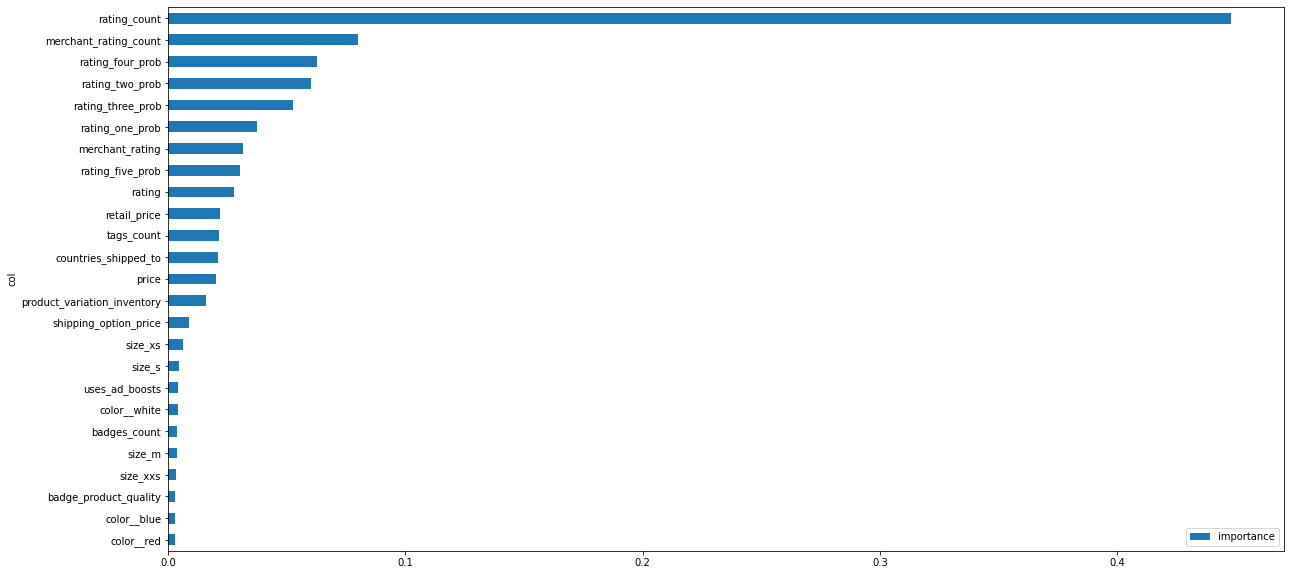

In [143]:
######## Feature Importances ########

im = pd.DataFrame({'col': X_train.columns, 'importance' : model.feature_importances_} )
im.sort_values(by='importance', ascending=True).set_index('col')[-25:].plot(kind='barh',figsize=(20, 10))

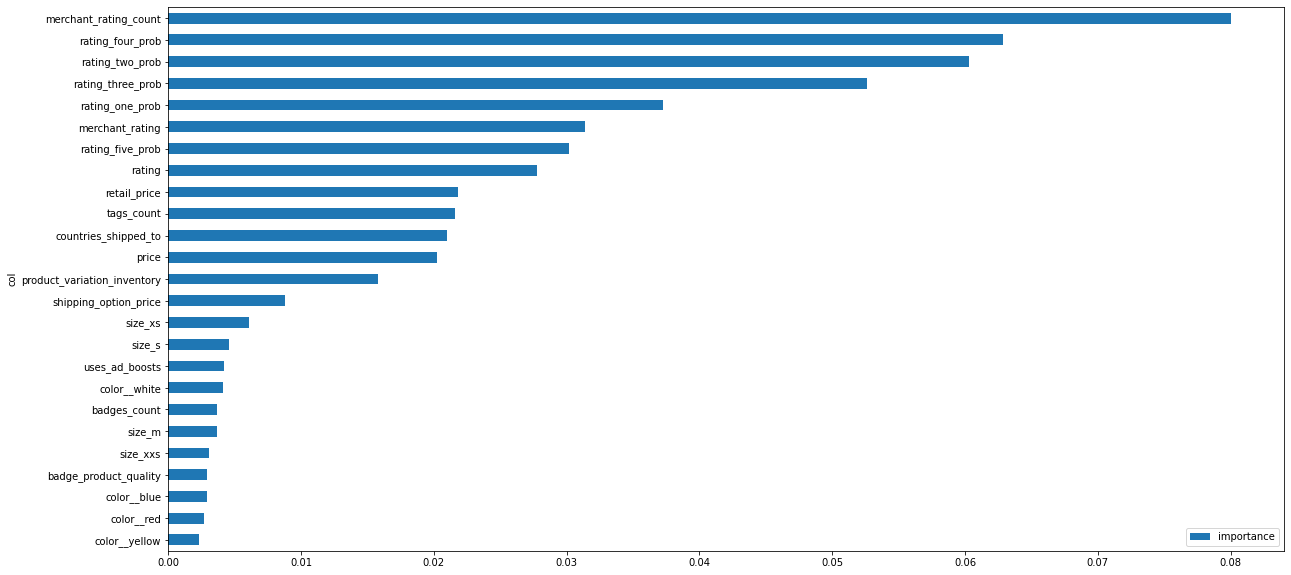

In [144]:

im = pd.DataFrame({'col': X_train.columns, 'importance' : model.feature_importances_} )
im = im[im['col']!='rating_count']
im.sort_values(by='importance', ascending=True).set_index('col')[-25:].plot(kind='barh',figsize=(20, 10))